In [1]:
# pip install geopandas
import pandas as pd
import geopandas as gpd
import re
from shapely.geometry import Point

# Load the CSV file into a pandas DataFrame
file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'
df_2018 = pd.read_csv(file_path + '/boston_2018.csv', low_memory = False)
df_2019 = pd.read_csv(file_path + '/boston_2019.csv', low_memory = False)
df_2020 = pd.read_csv(file_path + '/boston_2020.csv', low_memory = False)
df_2021 = pd.read_csv(file_path + '/boston_2021.csv', low_memory = False)
df_2022 = pd.read_csv(file_path + '/boston_2022.csv', low_memory = False)
df_2023 = pd.read_csv(file_path + '/boston_2023.csv', low_memory = False)

Crime Data: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/313e56df-6d77-49d2-9c49-ee411f10cf58
<br>ACS Data: https://data.census.gov/table/ACSDP5Y2022.DP05?q=population&g=050XX00US36005$8600000,36047$8600000,36061$8600000,36081$8600000,36085$8600000

In [2]:
combined_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472976 entries, 0 to 472975
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      472976 non-null  object 
 1   OFFENSE_CODE         472976 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  472976 non-null  object 
 4   DISTRICT             469628 non-null  object 
 5   REPORTING_AREA       472976 non-null  object 
 6   SHOOTING             374490 non-null  object 
 7   OCCURRED_ON_DATE     472976 non-null  object 
 8   YEAR                 472976 non-null  int64  
 9   MONTH                472976 non-null  int64  
 10  DAY_OF_WEEK          472976 non-null  object 
 11  HOUR                 472976 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               470679 non-null  object 
 14  Lat                  448945 non-null  float64
 15  Long             

In [4]:
combined_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)"


In [5]:
combined_df.columns = combined_df.columns.str.lower()

In [6]:
combined_df['year'].unique()

array([2018, 2019, 2020, 2021, 2022, 2023])

In [7]:
combined_df['occurred_on_date'].isnull().mean()

0.0

In [8]:
combined_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)"


In [9]:
combined_df['occurred_on_date'] = combined_df['occurred_on_date'].str.slice(0, 10)

In [10]:
combined_df['lat'].isnull().mean()

0.0508080748283211

In [11]:
combined_df['long'].isnull().mean()

0.0508080748283211

In [12]:
combined_df[combined_df['long'].isnull()].shape

(24031, 17)

In [13]:
combined_df = combined_df.dropna(subset=['long'])

In [14]:
file_path_geo = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData/ZIP_Codes.geojson'

zipcode = gpd.read_file(file_path_geo)
zipcode.head()

,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength,geometry
0,1,02134,3.721936e+07,40794.182396,"POLYGON ((-71.12340 42.36421, -71.12345 42.364..."
1,2,02125,6.476052e+07,62224.521440,"POLYGON ((-71.04541 42.32381, -71.04579 42.323..."
2,3,02110,6.637284e+06,18358.213496,"POLYGON ((-71.05109 42.36418, -71.05109 42.364..."
3,4,02118,3.116158e+07,32353.407618,"POLYGON ((-71.06315 42.34689, -71.06433 42.347..."
4,5,02126,6.078585e+07,45488.394711,"POLYGON ((-71.09670 42.29095, -71.09692 42.290..."


In [15]:
def create_point_from_string(coord_str):
    match = re.match(r'\(([^,]+), ([^)]+)\)', coord_str)
    if match:
        lat, lon = map(float, match.groups())
        return Point(lon, lat)
    return None

In [16]:
combined_df['geometry'] = combined_df['location'].apply(create_point_from_string)

In [17]:
combined_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,geometry
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08015661 42.33153805)
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423049 42.34977988)
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06594539 42.29109287)
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07283786 42.35352153)
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06356881 42.29632282)


In [18]:
gdf = gpd.GeoDataFrame(combined_df, geometry='geometry')

In [19]:
gdf.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,geometry
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08016 42.33154)
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423 42.34978)
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06595 42.29109)
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07284 42.35352)
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06357 42.29632)


In [20]:
gdf.set_crs(epsg=4326, inplace=True)
zipcode.set_crs(epsg=4326, inplace=True)
result = gpd.sjoin(gdf, zipcode, how="left", op='within')

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [21]:
result.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,...,street,lat,long,location,geometry,index_right,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01,2018,1,...,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08016 42.33154),10.0,11.0,02119,4.451150e+07,37680.702099
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01,2018,1,...,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423 42.34978),0.0,1.0,02134,3.721936e+07,40794.182396
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01,2018,1,...,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06595 42.29109),16.0,17.0,02124,8.565805e+07,57673.007747
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01,2018,1,...,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07284 42.35352),23.0,24.0,02116,1.911765e+07,23262.912273
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01,2018,1,...,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06357 42.29632),16.0,17.0,02124,8.565805e+07,57673.007747


In [22]:
result.set_index('occurred_on_date', inplace=True)

In [23]:
result.index = pd.to_datetime(result.index)

In [24]:
result.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,...,street,lat,long,location,geometry,index_right,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength
occurred_on_date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018,1,Monday,...,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08016 42.33154),10.0,11.0,02119,4.451150e+07,37680.702099
2018-01-01,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018,1,Monday,...,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423 42.34978),0.0,1.0,02134,3.721936e+07,40794.182396
2018-01-01,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018,1,Monday,...,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06595 42.29109),16.0,17.0,02124,8.565805e+07,57673.007747
2018-01-01,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018,1,Monday,...,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07284 42.35352),23.0,24.0,02116,1.911765e+07,23262.912273
2018-01-01,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018,1,Monday,...,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06357 42.29632),16.0,17.0,02124,8.565805e+07,57673.007747


In [25]:
weekly_data = result.groupby('ZIP5').resample('W').size().reset_index(name='total_count')

In [26]:
weekly_data['ZIP5'].unique().shape

(33,)

In [27]:
threshold_date = pd.to_datetime('2023-05-31')

In [28]:
weekly_data = weekly_data[weekly_data['occurred_on_date'] <= threshold_date]

NameError: name 'weekly_data' is not defined

In [29]:
mean_counts_by_zip = weekly_data.groupby('ZIP5')['total_count'].mean().reset_index()

In [30]:
mean_counts_by_zip

,ZIP5,total_count
0,02108,18.879433
1,02109,14.741135
2,02110,16.014184
3,02111,30.326241
4,02113,9.450355
5,02114,45.872340
6,02115,33.280142
7,02116,58.712766
8,02118,102.056738
9,02119,123.241135


In [31]:
weekly_data['total_count'].mean()

44.89677771709449

In [32]:
weekly_data.to_csv(file_path + '/boston_weekly_data.csv', index=False)

### Run from here!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'
weekly_data = pd.read_csv(file_path + '/boston_weekly_data.csv', low_memory = False)


In [2]:
weekly_data.head()

,ZIP5,occurred_on_date,total_count
0,2108,2018-01-07,12
1,2108,2018-01-14,16
2,2108,2018-01-21,18
3,2108,2018-01-28,16
4,2108,2018-02-04,15


In [3]:
pop = pd.read_csv(file_path + '/boston_2022_acs.csv', low_memory = False)
pop.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,DP05_0090PE,DP05_0090PM,DP05_0091PE,DP05_0091PM,Unnamed: 366
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,860Z200US01001,ZCTA5 01001,16045,946,7872,622,8173,608,96.3,9.4,...,0.8,(X),(X),12646,(X),48.1,2.6,51.9,2.6,NaN
2,860Z200US01002,ZCTA5 01002,22992,308,11654,488,11338,540,102.8,8.8,...,1.4,(X),(X),18046,(X),50.9,2.5,49.1,2.5,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,5680,381,6309,450,90.0,12.1,...,1.2,(X),(X),10352,(X),48.4,3.5,51.6,3.5,NaN
4,860Z200US01005,ZCTA5 01005,4837,465,2230,294,2607,344,85.5,15.4,...,0.9,(X),(X),3979,(X),44.2,5.6,55.8,5.6,NaN


In [4]:
pop.columns = pop.iloc[0]
pop = pop[1:]
pop.head()

,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),...,"Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or More Races!!Two races excluding Some Other Race, and three or more races",Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",NaN
1,860Z200US01001,ZCTA5 01001,16045,946,7872,622,8173,608,96.3,9.4,...,0.8,(X),(X),12646,(X),48.1,2.6,51.9,2.6,NaN
2,860Z200US01002,ZCTA5 01002,22992,308,11654,488,11338,540,102.8,8.8,...,1.4,(X),(X),18046,(X),50.9,2.5,49.1,2.5,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,5680,381,6309,450,90.0,12.1,...,1.2,(X),(X),10352,(X),48.4,3.5,51.6,3.5,NaN
4,860Z200US01005,ZCTA5 01005,4837,465,2230,294,2607,344,85.5,15.4,...,0.9,(X),(X),3979,(X),44.2,5.6,55.8,5.6,NaN
5,860Z200US01007,ZCTA5 01007,15368,59,7406,326,7962,336,93.0,8.0,...,0.9,(X),(X),12247,(X),47.0,2.1,53.0,2.1,NaN


In [5]:
pop.columns = pop.columns.str.lower()
pop.columns = pop.columns.str.replace(' ', '_')
pop.head()

,geography,geographic_area_name,estimate!!sex_and_age!!total_population,margin_of_error!!sex_and_age!!total_population,estimate!!sex_and_age!!total_population!!male,margin_of_error!!sex_and_age!!total_population!!male,estimate!!sex_and_age!!total_population!!female,margin_of_error!!sex_and_age!!total_population!!female,estimate!!sex_and_age!!total_population!!sex_ratio_(males_per_100_females),margin_of_error!!sex_and_age!!total_population!!sex_ratio_(males_per_100_females),...,"percent_margin_of_error!!hispanic_or_latino_and_race!!total_population!!not_hispanic_or_latino!!two_or_more_races!!two_races_excluding_some_other_race,_and_three_or_more_races",percent!!total_housing_units,percent_margin_of_error!!total_housing_units,"percent!!citizen,_voting_age_population!!citizen,_18_and_over_population","percent_margin_of_error!!citizen,_voting_age_population!!citizen,_18_and_over_population","percent!!citizen,_voting_age_population!!citizen,_18_and_over_population!!male","percent_margin_of_error!!citizen,_voting_age_population!!citizen,_18_and_over_population!!male","percent!!citizen,_voting_age_population!!citizen,_18_and_over_population!!female","percent_margin_of_error!!citizen,_voting_age_population!!citizen,_18_and_over_population!!female",NaN
1,860Z200US01001,ZCTA5 01001,16045,946,7872,622,8173,608,96.3,9.4,...,0.8,(X),(X),12646,(X),48.1,2.6,51.9,2.6,NaN
2,860Z200US01002,ZCTA5 01002,22992,308,11654,488,11338,540,102.8,8.8,...,1.4,(X),(X),18046,(X),50.9,2.5,49.1,2.5,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,5680,381,6309,450,90.0,12.1,...,1.2,(X),(X),10352,(X),48.4,3.5,51.6,3.5,NaN
4,860Z200US01005,ZCTA5 01005,4837,465,2230,294,2607,344,85.5,15.4,...,0.9,(X),(X),3979,(X),44.2,5.6,55.8,5.6,NaN
5,860Z200US01007,ZCTA5 01007,15368,59,7406,326,7962,336,93.0,8.0,...,0.9,(X),(X),12247,(X),47.0,2.1,53.0,2.1,NaN


In [6]:
pop['geographic_area_name'] = pop['geographic_area_name'].str.slice(6, 11)

In [7]:
pop = pop.rename(columns={'geographic_area_name': 'ZIP5'})

In [8]:
pop = pop.iloc[:, [1, 2]]

In [9]:
weekly_data['ZIP5'] = weekly_data['ZIP5'].astype(str).str.zfill(5)

In [10]:
merged_df = pd.merge(weekly_data, pop, on='ZIP5', how='left')
merged_df.head()

,ZIP5,occurred_on_date,total_count,estimate!!sex_and_age!!total_population
0,02108,2018-01-07,12,4218
1,02108,2018-01-14,16,4218
2,02108,2018-01-21,18,4218
3,02108,2018-01-28,16,4218
4,02108,2018-02-04,15,4218


In [11]:
merged_df = merged_df.rename(columns={'estimate!!sex_and_age!!total_population': 'total_population'})

In [12]:
merged_df.head()

,ZIP5,occurred_on_date,total_count,total_population
0,02108,2018-01-07,12,4218
1,02108,2018-01-14,16,4218
2,02108,2018-01-21,18,4218
3,02108,2018-01-28,16,4218
4,02108,2018-02-04,15,4218


In [13]:
merged_df['total_population'] = pd.to_numeric(merged_df['total_population'].str.replace(',', ''), errors='coerce').astype(int)
merged_df['crime_rate'] = (merged_df['total_count'] / merged_df['total_population']) * 10000
merged_df = merged_df.rename(columns={'occurred_on_date': 'week'})

In [14]:
merged_df = merged_df[merged_df['total_population'] != 0]

In [15]:
merged_df.head()

,ZIP5,week,total_count,total_population,crime_rate
0,02108,2018-01-07,12,4218,28.449502
1,02108,2018-01-14,16,4218,37.932670
2,02108,2018-01-21,18,4218,42.674253
3,02108,2018-01-28,16,4218,37.932670
4,02108,2018-02-04,15,4218,35.561878


In [16]:
merged_df['week'] = pd.to_datetime(merged_df['week'])

In [17]:
merged_df.to_csv(file_path + '/boston_weekly_data_rate.csv', index=False)

In [18]:
import pandas as pd

file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'

merged_df = pd.read_csv(file_path + '/boston_weekly_data_rate.csv')

In [19]:
df_plot = merged_df

In [20]:
df_plot.set_index('week', inplace=True)

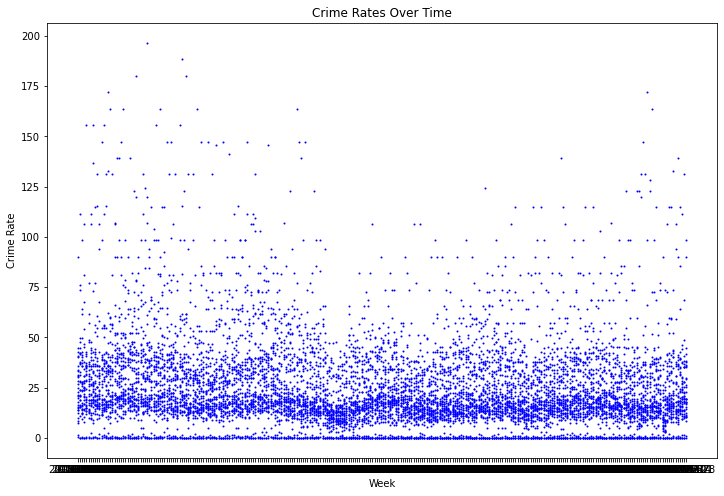

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_plot.index, df_plot['crime_rate'], marker='o', linestyle='None', color='b', markersize=1)

plt.title('Crime Rates Over Time')
plt.xlabel('Week')
plt.ylabel('Crime Rate')
plt.show()

In [23]:
merged_df.head()

,ZIP5,total_count,total_population,crime_rate
week,,,,
2018-01-07,2108,12,4218,28.449502
2018-01-14,2108,16,4218,37.932670
2018-01-21,2108,18,4218,42.674253
2018-01-28,2108,16,4218,37.932670
2018-02-04,2108,15,4218,35.561878


In [24]:
merged_df['ZIP5'] = merged_df['ZIP5'].astype(str).str.zfill(5)
merged_df = pd.read_csv(file_path + '/boston_weekly_data_rate.csv')

In [25]:
statistics = merged_df.describe().T

# Display the descriptive statistics
print(statistics)

                   count          mean           std     min          25%  \
ZIP5              8875.0   2143.914366     64.503501  2108.0  2116.000000   
total_count       8875.0     46.244845     37.357601     0.0    16.000000   
total_population  8875.0  23938.816113  15452.389700  1221.0  8417.000000   
crime_rate        8875.0     24.797943     21.452336     0.0    12.642567   

                           50%           75%           max  
ZIP5               2126.000000   2135.000000   2467.000000  
total_count          38.000000     70.000000    220.000000  
total_population  24705.000000  31903.000000  60592.000000  
crime_rate           18.845912     33.266009    196.560197  


In [5]:
merged_df['ZIP5'].nunique()

32

In [6]:
print(merged_df['total_count'].median())
print(merged_df['total_population'].median())
print(merged_df['total_count'].median())

38.0
24705.0
38.0


In [7]:
merged_df['total_count'].sum()/merged_df.groupby('ZIP5')['total_population'].first().sum()

0.5381015937613082

In [35]:
merged_df.head(4)

,ZIP5,week,total_count,total_population,crime_rate
0,2108,2018-01-07,12,4218,28.449502
1,2108,2018-01-14,16,4218,37.932670
2,2108,2018-01-21,18,4218,42.674253
3,2108,2018-01-28,16,4218,37.932670


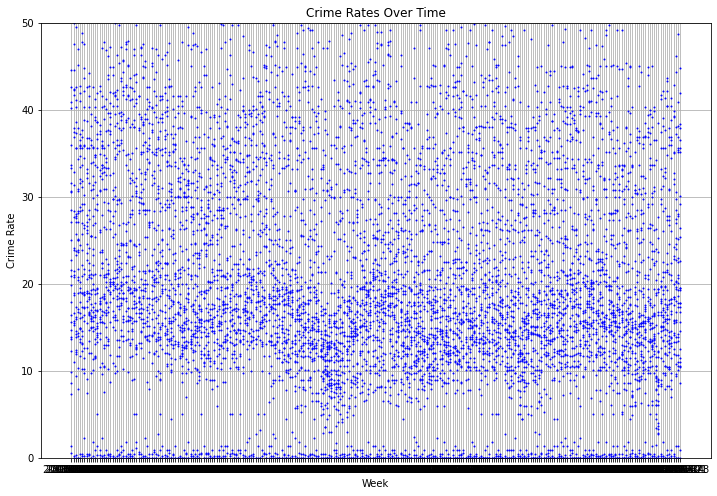

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.plot(df_plot.index, df_plot['crime_rate'], marker='o', linestyle='None', color='b', markersize=1)
plt.ylim(0, 50)

plt.title('Crime Rates Over Time')
plt.xlabel('Week')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()

In [29]:
df_plot_temp = df_plot.reset_index()

In [30]:
df_plot_temp.head()

,week,ZIP5,total_count,total_population,crime_rate
0,2018-01-07,02108,12,4218,28.449502
1,2018-01-14,02108,16,4218,37.932670
2,2018-01-21,02108,18,4218,42.674253
3,2018-01-28,02108,16,4218,37.932670
4,2018-02-04,02108,15,4218,35.561878


In [31]:
df_plot_temp = df_plot_temp.sort_values(by='week').reset_index()

In [42]:
df_plot_temp['week'] = pd.to_datetime(df_plot_temp['week'])


In [43]:
min_date = df_plot_temp['week'].min()
df_plot_temp['week_no'] = ((df_plot_temp['week'] - min_date).dt.days // 7) + 1

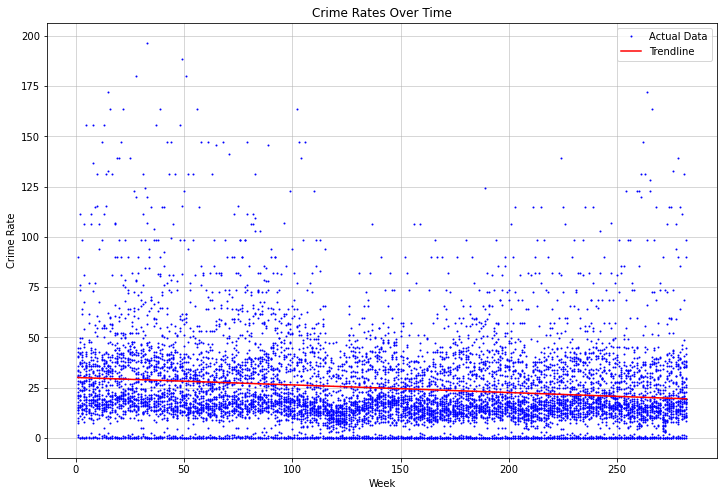

In [44]:
x = np.arange(len(df_plot_temp['week_no'])).reshape(-1, 1)
y = df_plot_temp['crime_rate']

# Fit linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_plot_temp['week_no'], y, marker='o', linestyle='None', color='b', markersize=1, label='Actual Data')
plt.plot(df_plot_temp['week_no'], y_pred, color='r', label='Trendline')

plt.title('Crime Rates Over Time')
plt.xlabel('Week')
plt.ylabel('Crime Rate')
plt.grid(True, linewidth=0.5)
plt.legend()
plt.show()

# S2301 Employment

In [53]:
df = pd.read_csv(file_path + '/control/ACSST5Y2022.S2301-Data.csv', low_memory=False)
df.head()

,GEO_ID,NAME,S2301_C01_001E,S2301_C01_001M,S2301_C01_002E,S2301_C01_002M,S2301_C01_003E,S2301_C01_003M,S2301_C01_004E,S2301_C01_004M,...,S2301_C04_031M,S2301_C04_032E,S2301_C04_032M,S2301_C04_033E,S2301_C04_033M,S2301_C04_034E,S2301_C04_034M,S2301_C04_035E,S2301_C04_035M,Unnamed: 282
0,Geography,Geographic Area Name,Estimate!!Total!!Population 16 years and over,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over!...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over!...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over!...,Margin of Error!!Total!!Population 16 years an...,...,Margin of Error!!Unemployment rate!!EDUCATIONA...,Estimate!!Unemployment rate!!EDUCATIONAL ATTAI...,Margin of Error!!Unemployment rate!!EDUCATIONA...,Estimate!!Unemployment rate!!EDUCATIONAL ATTAI...,Margin of Error!!Unemployment rate!!EDUCATIONA...,Estimate!!Unemployment rate!!EDUCATIONAL ATTAI...,Margin of Error!!Unemployment rate!!EDUCATIONA...,Estimate!!Unemployment rate!!EDUCATIONAL ATTAI...,Margin of Error!!Unemployment rate!!EDUCATIONA...,NaN
1,860Z200US01431,ZCTA5 01431,2754,77,125,49,124,46,142,63,...,2.3,4.8,8.3,10.0,7.2,0.0,10.0,3.4,2.9,NaN
2,860Z200US01432,ZCTA5 01432,6865,257,316,194,643,232,383,180,...,3.6,0.0,10.0,1.0,2.3,12.2,11.1,0.0,2.3,NaN
3,860Z200US01434,ZCTA5 01434,1597,296,134,143,64,58,77,60,...,9.7,-,**,0.0,57.3,0.0,39.2,0.0,12.9,NaN
4,860Z200US01450,ZCTA5 01450,8516,429,552,125,648,227,415,127,...,3.7,0.0,33.6,0.0,8.2,1.8,2.8,7.3,4.9,NaN


In [54]:
df2022 = df[['NAME', 'S2301_C03_001E', 'S2301_C04_001E']]
df2022 = df2022.iloc[1:].reset_index(drop=True)
df2022.columns = ['ZCTA5CE10', '2022e/pop', '2022un_rate']
df2022['ZCTA5CE10'] = df2022['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2022.head()

,ZCTA5CE10,2022e/pop,2022un_rate
0,01431,66.2,5.0
1,01432,69.5,5.8
2,01434,30.3,1.0
3,01450,67.5,4.9
4,01460,63.2,5.5


In [55]:
df = pd.read_csv(file_path + '/control/ACSST5Y2021.S2301-Data.csv', low_memory=False)
df2021 = df[['NAME', 'S2301_C03_001E', 'S2301_C04_001E']]
df2021 = df2021.iloc[1:].reset_index(drop=True)
df2021.columns = ['ZCTA5CE10', '2021e/pop', '2021un_rate']
df2021['ZCTA5CE10'] = df2021['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2021.head()

,ZCTA5CE10,2021e/pop,2021un_rate
0,01431,67.7,4.7
1,01432,71.3,5.3
2,01434,36.5,0.9
3,01450,66.7,5.3
4,01460,63.7,5.9


In [56]:
df = pd.read_csv(file_path + '/control/ACSST5Y2020.S2301-Data.csv', low_memory=False)
df2020 = df[['NAME', 'S2301_C03_001E', 'S2301_C04_001E']]
df2020 = df2020.iloc[1:].reset_index(drop=True)
df2020.columns = ['ZCTA5CE10', '2020e/pop', '2020un_rate']
df2020['ZCTA5CE10'] = df2020['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2020.head()

,ZCTA5CE10,2020e/pop,2020un_rate
0,01431,68.0,4.2
1,01432,72.8,4.3
2,01434,30.5,1.9
3,01450,66.7,3.8
4,01460,64.3,5.3


In [57]:
df = pd.read_csv(file_path + '/control/ACSST5Y2019.S2301-Data.csv', low_memory=False)
df2019 = df[['NAME', 'S2301_C03_001E', 'S2301_C04_001E']]
df2019 = df2019.iloc[1:].reset_index(drop=True)
df2019.columns = ['ZCTA5CE10', '2019e/pop', '2019un_rate']
df2019['ZCTA5CE10'] = df2019['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2019.head()

,ZCTA5CE10,2019e/pop,2019un_rate
0,01431,67.1,3.7
1,01432,71.5,1.6
2,01434,24.2,1.8
3,01450,63.6,3.4
4,01460,66.5,4.5


In [58]:
df = pd.read_csv(file_path + '/control/ACSST5Y2018.S2301-Data.csv', low_memory=False)
df2018 = df[['NAME', 'S2301_C03_001E', 'S2301_C04_001E']]
df2018 = df2018.iloc[1:].reset_index(drop=True)
df2018.columns = ['ZCTA5CE10', '2018e/pop', '2018un_rate']
df2018['ZCTA5CE10'] = df2018['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2018.head()

,ZCTA5CE10,2018e/pop,2018un_rate
0,01431,64.0,5.0
1,01432,73.8,2.4
2,01434,18.2,6.6
3,01450,63.5,4.1
4,01460,66.3,4.6


In [59]:
# merge them sequentially
from functools import reduce
dfs = [df2018, df2019, df2020, df2021, df2022]
def merge_dfs(dfs, key, how='outer'):
    return reduce(lambda left, right: pd.merge(left, right, on=key, how=how), dfs)
employment = merge_dfs(dfs, 'ZCTA5CE10', 'outer')
employment.head()

,ZCTA5CE10,2018e/pop,2018un_rate,2019e/pop,2019un_rate,2020e/pop,2020un_rate,2021e/pop,2021un_rate,2022e/pop,2022un_rate
0,01431,64.0,5.0,67.1,3.7,68.0,4.2,67.7,4.7,66.2,5.0
1,01432,73.8,2.4,71.5,1.6,72.8,4.3,71.3,5.3,69.5,5.8
2,01434,18.2,6.6,24.2,1.8,30.5,1.9,36.5,0.9,30.3,1.0
3,01450,63.5,4.1,63.6,3.4,66.7,3.8,66.7,5.3,67.5,4.9
4,01460,66.3,4.6,66.5,4.5,64.3,5.3,63.7,5.9,63.2,5.5


In [60]:
employment.shape

(301, 11)

# S1701 poverty

In [139]:
df = pd.read_csv(file_path + '/control/ACSST5Y2022.S1701-Data.csv', low_memory=False)
df.head()

,GEO_ID,NAME,S1701_C01_001E,S1701_C01_001M,S1701_C01_002E,S1701_C01_002M,S1701_C01_003E,S1701_C01_003M,S1701_C01_004E,S1701_C01_004M,...,S1701_C03_058M,S1701_C03_059E,S1701_C03_059M,S1701_C03_060E,S1701_C03_060M,S1701_C03_061E,S1701_C03_061M,S1701_C03_062E,S1701_C03_062M,Unnamed: 374
0,Geography,Geographic Area Name,Estimate!!Total!!Population for whom poverty s...,Margin of Error!!Total!!Population for whom po...,Estimate!!Total!!Population for whom poverty s...,Margin of Error!!Total!!Population for whom po...,Estimate!!Total!!Population for whom poverty s...,Margin of Error!!Total!!Population for whom po...,Estimate!!Total!!Population for whom poverty s...,Margin of Error!!Total!!Population for whom po...,...,Margin of Error!!Percent below poverty level!!...,Estimate!!Percent below poverty level!!UNRELAT...,Margin of Error!!Percent below poverty level!!...,Estimate!!Percent below poverty level!!UNRELAT...,Margin of Error!!Percent below poverty level!!...,Estimate!!Percent below poverty level!!UNRELAT...,Margin of Error!!Percent below poverty level!!...,Estimate!!Percent below poverty level!!UNRELAT...,Margin of Error!!Percent below poverty level!!...,NaN
1,860Z200US01001,ZCTA5 01001,15554,939,2785,437,888,221,1897,427,...,(X),0.8,1.3,21.9,15.4,33.2,10.0,6.9,2.2,NaN
2,860Z200US01002,ZCTA5 01002,20017,288,2978,280,682,176,2296,245,...,(X),11.7,8.0,56.4,7.9,54.0,8.4,21.9,2.9,NaN
3,860Z200US01003,ZCTA5 01003,46,40,0,21,0,21,0,21,...,(X),-,**,0.0,100.0,100.0,100.0,0.0,53.0,NaN
4,860Z200US01005,ZCTA5 01005,4725,466,706,274,120,100,586,248,...,(X),0.0,13.8,41.4,37.9,30.6,34.8,8.2,5.5,NaN


In [140]:
df = pd.read_csv(file_path + '/control/ACSST5Y2022.S1701-Data.csv', low_memory=False)
df2022 = df[['NAME', 'S1701_C03_001E']]
df2022 = df2022.iloc[1:].reset_index(drop=True)
df2022.columns = ['ZCTA5CE10', '2022p_rate']
df2022['ZCTA5CE10'] = df2022['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2022.head()

,ZCTA5CE10,2022p_rate
0,01001,7.1
1,01002,22.2
2,01003,6.5
3,01005,8.9
4,01007,8.3


In [141]:
df = pd.read_csv(file_path + '/control/ACSST5Y2021.S1701-Data.csv', low_memory=False)
df2021 = df[['NAME', 'S1701_C03_001E']]
df2021 = df2021.iloc[1:].reset_index(drop=True)
df2021.columns = ['ZCTA5CE10', '2021p_rate']
df2021['ZCTA5CE10'] = df2021['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2021.head()

,ZCTA5CE10,2021p_rate
0,01001,7.6
1,01002,23.0
2,01003,8.1
3,01005,11.8
4,01007,7.1


In [142]:
df = pd.read_csv(file_path + '/control/ACSST5Y2020.S1701-Data.csv', low_memory=False)
df2020 = df[['NAME', 'S1701_C03_001E']]
df2020 = df2020.iloc[1:].reset_index(drop=True)
df2020.columns = ['ZCTA5CE10', '2020p_rate']
df2020['ZCTA5CE10'] = df2020['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2020.head()

,ZCTA5CE10,2020p_rate
0,01001,8.4
1,01002,23.8
2,01003,61.5
3,01005,11.1
4,01007,5.0


In [143]:
df = pd.read_csv(file_path + '/control/ACSST5Y2019.S1701-Data.csv', low_memory=False)
df2019 = df[['NAME', 'S1701_C03_001E']]
df2019 = df2019.iloc[1:].reset_index(drop=True)
df2019.columns = ['ZCTA5CE10', '2019p_rate']
df2019['ZCTA5CE10'] = df2019['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2019.head()

,ZCTA5CE10,2019p_rate
0,01001,8.5
1,01002,26.0
2,01003,80.2
3,01005,8.6
4,01007,6.1


In [144]:
df = pd.read_csv(file_path + '/control/ACSST5Y2018.S1701-Data.csv', low_memory=False)
df2018 = df[['NAME', 'S1701_C03_001E']]
df2018 = df2018.iloc[1:].reset_index(drop=True)
df2018.columns = ['ZCTA5CE10', '2018p_rate']
df2018['ZCTA5CE10'] = df2018['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2018.head()

,ZCTA5CE10,2018p_rate
0,01001,9.0
1,01002,28.7
2,01003,79.3
3,01005,6.9
4,01007,5.3


In [145]:
# merge them sequentially
from functools import reduce
dfs = [df2018, df2019, df2020, df2021, df2022]
def merge_dfs(dfs, key, how='outer'):
    return reduce(lambda left, right: pd.merge(left, right, on=key, how=how), dfs)
poverty = merge_dfs(dfs, 'ZCTA5CE10', 'outer')
poverty.head()

,ZCTA5CE10,2018p_rate,2019p_rate,2020p_rate,2021p_rate,2022p_rate
0,01001,9.0,8.5,8.4,7.6,7.1
1,01002,28.7,26.0,23.8,23.0,22.2
2,01003,79.3,80.2,61.5,8.1,6.5
3,01005,6.9,8.6,11.1,11.8,8.9
4,01007,5.3,6.1,5.0,7.1,8.3


In [146]:
poverty.shape

(545, 6)

# S1901 Household Income 

In [165]:
df = pd.read_csv(file_path + '/control/ACSST5Y2022.S1901-Data.csv', low_memory=False)
df2022 = df[['NAME', 'S1901_C01_012E', 'S1901_C01_013E']]
df2022 = df2022.iloc[1:].reset_index(drop=True)
df2022.columns = ['ZCTA5CE10', '2022in_median', '2022in_mean']
df2022['ZCTA5CE10'] = df2022['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2022.head()

,ZCTA5CE10,2022in_median,2022in_mean
0,01001,73398,96621
1,01002,74265,111002
2,01003,-,205737
3,01005,97409,104738
4,01007,99500,113793


In [166]:
df = pd.read_csv(file_path + '/control/ACSST5Y2021.S1901-Data.csv', low_memory=False)
df2021 = df[['NAME', 'S1901_C01_012E', 'S1901_C01_013E']]
df2021 = df2021.iloc[1:].reset_index(drop=True)
df2021.columns = ['ZCTA5CE10', '2021in_median', '2021in_mean']
df2021['ZCTA5CE10'] = df2021['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2021.head()

,ZCTA5CE10,2021in_median,2021in_mean
0,01001,72444,94323
1,01002,65013,104186
2,01003,-,N
3,01005,103477,106135
4,01007,101076,113474


In [167]:
df = pd.read_csv(file_path + '/control/ACSST5Y2020.S1901-Data.csv', low_memory=False)
df2020 = df[['NAME', 'S1901_C01_012E', 'S1901_C01_013E']]
df2020 = df2020.iloc[1:].reset_index(drop=True)
df2020.columns = ['ZCTA5CE10', '2020in_median', '2020in_mean']
df2020['ZCTA5CE10'] = df2020['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2020.head()

,ZCTA5CE10,2020in_median,2020in_mean
0,01001,66088,84237
1,01002,60540,102003
2,01003,-,N
3,01005,80060,101548
4,01007,94812,110535


In [168]:
df = pd.read_csv(file_path + '/control/ACSST5Y2019.S1901-Data.csv', low_memory=False)
df2019 = df[['NAME', 'S1901_C01_012E', 'S1901_C01_013E']]
df2019 = df2019.iloc[1:].reset_index(drop=True)
df2019.columns = ['ZCTA5CE10', '2019in_median', '2019in_mean']
df2019['ZCTA5CE10'] = df2019['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2019.head()

,ZCTA5CE10,2019in_median,2019in_mean
0,01001,63949,81177
1,01002,61159,91025
2,01003,"2,500-",N
3,01005,67302,95841
4,01007,91191,111617


In [169]:
df = pd.read_csv(file_path + '/control/ACSST5Y2018.S1901-Data.csv', low_memory=False)
df2018 = df[['NAME', 'S1901_C01_012E', 'S1901_C01_013E']]
df2018 = df2018.iloc[1:].reset_index(drop=True)
df2018.columns = ['ZCTA5CE10', '2018in_median', '2018in_mean']
df2018['ZCTA5CE10'] = df2018['ZCTA5CE10'].str.replace('ZCTA5 ', '')
df2018.head()

,ZCTA5CE10,2018in_median,2018in_mean
0,01001,62144,78870
1,01002,55858,85653
2,01003,"2,500-",N
3,01005,68278,94293
4,01007,93300,114222


In [170]:
from functools import reduce
dfs = [df2018, df2019, df2020, df2021, df2022]
def merge_dfs(dfs, key, how='outer'):
    return reduce(lambda left, right: pd.merge(left, right, on=key, how=how), dfs)
income = merge_dfs(dfs, 'ZCTA5CE10', 'outer')
income.head()

,ZCTA5CE10,2018in_median,2018in_mean,2019in_median,2019in_mean,2020in_median,2020in_mean,2021in_median,2021in_mean,2022in_median,2022in_mean
0,01001,62144,78870,63949,81177,66088,84237,72444,94323,73398,96621
1,01002,55858,85653,61159,91025,60540,102003,65013,104186,74265,111002
2,01003,"2,500-",N,"2,500-",N,-,N,-,N,-,205737
3,01005,68278,94293,67302,95841,80060,101548,103477,106135,97409,104738
4,01007,93300,114222,91191,111617,94812,110535,101076,113474,99500,113793


In [171]:
income.shape

(545, 11)

In [172]:
income.dtypes

ZCTA5CE10        object
2018in_median    object
2018in_mean      object
2019in_median    object
2019in_mean      object
2020in_median    object
2020in_mean      object
2021in_median    object
2021in_mean      object
2022in_median    object
2022in_mean      object
dtype: object

# Regression

In [111]:
merged_df = pd.read_csv(file_path + '/boston_weekly_data_rate.csv')
merged_df.head()

,ZIP5,week,total_count,total_population,crime_rate
0,2108,2018-01-07,12,4218,28.449502
1,2108,2018-01-14,16,4218,37.932670
2,2108,2018-01-21,18,4218,42.674253
3,2108,2018-01-28,16,4218,37.932670
4,2108,2018-02-04,15,4218,35.561878


In [112]:
merged_df['ZIP5'] = merged_df['ZIP5'].astype(str).str.zfill(5)
merged_df.head()

,ZIP5,week,total_count,total_population,crime_rate
0,02108,2018-01-07,12,4218,28.449502
1,02108,2018-01-14,16,4218,37.932670
2,02108,2018-01-21,18,4218,42.674253
3,02108,2018-01-28,16,4218,37.932670
4,02108,2018-02-04,15,4218,35.561878


In [113]:
merged_df['ZIP5'].unique()

array(['02108', '02109', '02110', '02111', '02113', '02114', '02115',
       '02116', '02118', '02119', '02120', '02121', '02122', '02124',
       '02125', '02126', '02127', '02128', '02129', '02130', '02131',
       '02132', '02134', '02135', '02136', '02151', '02152', '02163',
       '02199', '02210', '02215', '02467'], dtype=object)

In [114]:
#create a year variable
merged_df['week'] = pd.to_datetime(merged_df['week'])
merged_df['year'] = merged_df['week'].dt.year

In [148]:
merged_df = merged_df.rename(columns={'ZIP5': 'ZCTA5CE10'})

In [147]:
poverty.head()

,ZCTA5CE10,2018p_rate,2019p_rate,2020p_rate,2021p_rate,2022p_rate
0,01001,9.0,8.5,8.4,7.6,7.1
1,01002,28.7,26.0,23.8,23.0,22.2
2,01003,79.3,80.2,61.5,8.1,6.5
3,01005,6.9,8.6,11.1,11.8,8.9
4,01007,5.3,6.1,5.0,7.1,8.3


In [149]:
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,p_rate
0,02108,2018-01-07,12,4218,28.449502,2018,0.0
1,02108,2018-01-14,16,4218,37.932670,2018,0.0
2,02108,2018-01-21,18,4218,42.674253,2018,0.0
3,02108,2018-01-28,16,4218,37.932670,2018,0.0
4,02108,2018-02-04,15,4218,35.561878,2018,0.0


In [150]:
#poverty rate
poverty.set_index('ZCTA5CE10', inplace=True)
merged_df['p_rate'] = 0.0

year_to_pov_col = {2018: '2018p_rate', 2019: '2019p_rate', 2020: '2020p_rate', 2021: '2021p_rate', 2022: '2022p_rate'}

def get_poverty_rate(row):
    # Get the poverty rate column name for the year
    pov_col = year_to_pov_col.get(row['year'])
    # If the year is not in the dictionary, return NaN
    if pov_col is None:
        return pd.NA
    return poverty.loc[row['ZCTA5CE10'], pov_col]

merged_df['p_rate'] = merged_df.apply(get_poverty_rate, axis=1)
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,p_rate
0,02108,2018-01-07,12,4218,28.449502,2018,10.8
1,02108,2018-01-14,16,4218,37.932670,2018,10.8
2,02108,2018-01-21,18,4218,42.674253,2018,10.8
3,02108,2018-01-28,16,4218,37.932670,2018,10.8
4,02108,2018-02-04,15,4218,35.561878,2018,10.8


In [151]:
employment.set_index('ZCTA5CE10', inplace=True)
year_to_e_pop_col = {year: f'{year}e/pop' for year in range(2018, 2023)}
year_to_un_rate_col = {year: f'{year}un_rate' for year in range(2018, 2023)}

def get_employment_data(row, e_pop_col_dict, un_rate_col_dict, employment):
    e_pop_col = e_pop_col_dict.get(row['year'])
    un_rate_col = un_rate_col_dict.get(row['year'])
    e_pop_rate = employment.at[row['ZCTA5CE10'], e_pop_col] if e_pop_col else pd.NA
    un_rate = employment.at[row['ZCTA5CE10'], un_rate_col] if un_rate_col else pd.NA
    return e_pop_rate, un_rate

merged_df[['e/pop', 'un_rate']] = merged_df.apply(lambda row: get_employment_data(row, year_to_e_pop_col, year_to_un_rate_col, employment), axis=1, result_type='expand')
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,p_rate,e/pop,un_rate
0,02108,2018-01-07,12,4218,28.449502,2018,10.8,61.2,8.3
1,02108,2018-01-14,16,4218,37.932670,2018,10.8,61.2,8.3
2,02108,2018-01-21,18,4218,42.674253,2018,10.8,61.2,8.3
3,02108,2018-01-28,16,4218,37.932670,2018,10.8,61.2,8.3
4,02108,2018-02-04,15,4218,35.561878,2018,10.8,61.2,8.3


In [164]:
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,p_rate,e/pop,un_rate
0,02108,2018-01-07,12,4218,28.449502,2018,10.8,61.2,8.3
1,02108,2018-01-14,16,4218,37.932670,2018,10.8,61.2,8.3
2,02108,2018-01-21,18,4218,42.674253,2018,10.8,61.2,8.3
3,02108,2018-01-28,16,4218,37.932670,2018,10.8,61.2,8.3
4,02108,2018-02-04,15,4218,35.561878,2018,10.8,61.2,8.3


In [173]:
income.set_index('ZCTA5CE10', inplace=True)
year_to_in_median_col = {year: f'{year}in_median' for year in range(2018, 2023)}
year_to_in_mean_col = {year: f'{year}in_mean' for year in range(2018, 2023)}

def get_income_data(row, in_median_col_dict, in_mean_col_dict, income):
    in_median_col = in_median_col_dict.get(row['year'])
    in_mean_col = in_mean_col_dict.get(row['year'])
    in_median = income.at[row['ZCTA5CE10'], in_median_col] if in_median_col else pd.NA
    in_mean = income.at[row['ZCTA5CE10'], in_mean_col] if in_mean_col else pd.NA
    return in_median, in_mean

merged_df[['in_median', 'in_mean']] = merged_df.apply(lambda row: get_income_data(row, year_to_in_median_col, year_to_in_mean_col, income), axis=1, result_type='expand')
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,p_rate,e/pop,un_rate,in_median,in_mean
0,02108,2018-01-07,12,4218,28.449502,2018,10.8,61.2,8.3,136667,222479
1,02108,2018-01-14,16,4218,37.932670,2018,10.8,61.2,8.3,136667,222479
2,02108,2018-01-21,18,4218,42.674253,2018,10.8,61.2,8.3,136667,222479
3,02108,2018-01-28,16,4218,37.932670,2018,10.8,61.2,8.3,136667,222479
4,02108,2018-02-04,15,4218,35.561878,2018,10.8,61.2,8.3,136667,222479


In [176]:
rows_with_na = merged_df[merged_df.isna().any(axis=1)]
rows_with_na.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,p_rate,e/pop,un_rate,in_median,in_mean
260,02108,2023-01-01,13,4218,30.820294,2023,<NA>,<NA>,<NA>,<NA>,<NA>
261,02108,2023-01-08,16,4218,37.932670,2023,<NA>,<NA>,<NA>,<NA>,<NA>
262,02108,2023-01-15,19,4218,45.045045,2023,<NA>,<NA>,<NA>,<NA>,<NA>
263,02108,2023-01-22,28,4218,66.382172,2023,<NA>,<NA>,<NA>,<NA>,<NA>
264,02108,2023-01-29,15,4218,35.561878,2023,<NA>,<NA>,<NA>,<NA>,<NA>


In [174]:
merged_df_lr = crime
merged_df_lr['in_median'] = merged_df_lr['in_median'].astype(str)
merged_df_lr['in_median'] = merged_df_lr['in_median'].replace('250,000+', '250000')

crime_df['p_rate'] = pd.to_numeric(crime_df['p_rate'], errors='coerce')
crime_df['un_rate'] = pd.to_numeric(crime_df['un_rate'], errors='coerce')

crime_df.dropna(subset=['p_rate', 'un_rate', 'in_median', 'crime_rate'], inplace=True)

X = crime_df[['p_rate', 'un_rate', 'in_median']].astype(float) 
Y = crime_df['crime_rate'].astype(float) 

NameError: name 'crime' is not defined

In [ ]:
model = sm.OLS(Y, X).fit()
print(model.summary())